## CardioHealth: Predicting Heart Failure with Machine Learning

Lebelo Hailesilassie

In this end -to-end machine learning project, my objective is to develope predictive models using Random Forest and Support Vector Machine algorithms for heart failure analysis.
Cardiovascular diseases(CVDS) and number one cause of death globally, claiming approximatley 17.9 million lives annually, which represents 31% of all deaths worldwide. Heart failure is a common occurrence resulting from CVDs, and my dataset contains 12 essential features that can be leveraged to predict mortality due to heart failure. By harnessing this data, I aim to create accurate and reliable models that can assist in early detection, prognosis, and personalized treatment recommendations to combat heart failure and contribute to reducing the burden of CVD-related mortality.

#### Needed Basic Python Libraries

In [332]:
# Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Ignore all warnings
import warnings
warnings.filterwarnings('ignore')

#### Read CSV Data

The dataset contains medical records of 299 heart failure patients collected at the Faisalabad  Institute of Cardiology and at the Allied Hospital in Faisalabad (Punjab, Pakistan) during April-December 2015.
The patients consisted of 105 women and 194 men, and their ages ranges between 40 and 95 years old. All 299 patients had left ventricular systolic dysfunction and had previous heart failure that put them in classes III or IV of New York Heart Association (NYHA) classification of the stages of heart failure.

In [333]:
# Import data
data_df=pd.read_csv('heart_failure_clinical_records_dataset.csv',
                   skipinitialspace=True,
                   float_precision='round_trip')
data_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


#### Data Inspection

In [334]:
# check shape
data_df.shape

(299, 13)

In [335]:
# check info and dataypes
data_df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [336]:
data_df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [337]:
# check for missing values
print ('Missing Values in each column')
print(data_df.isnull().sum())

Missing Values in each column
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


Note : 

The dataset looks to be clean without an missing values in all variables.

### Exploratory Data Analysis for Binary Variables

 1. Anaemia
 2. Diabetes Mellitus
 3. High Blood Pressure
 4. Sex
 5. Smoking
 6. Death Event

Categorical Data Distribution

In [338]:
categorical_columns=['anaemia','diabetes','high_blood_pressure',
              'sex','smoking','DEATH_EVENT']

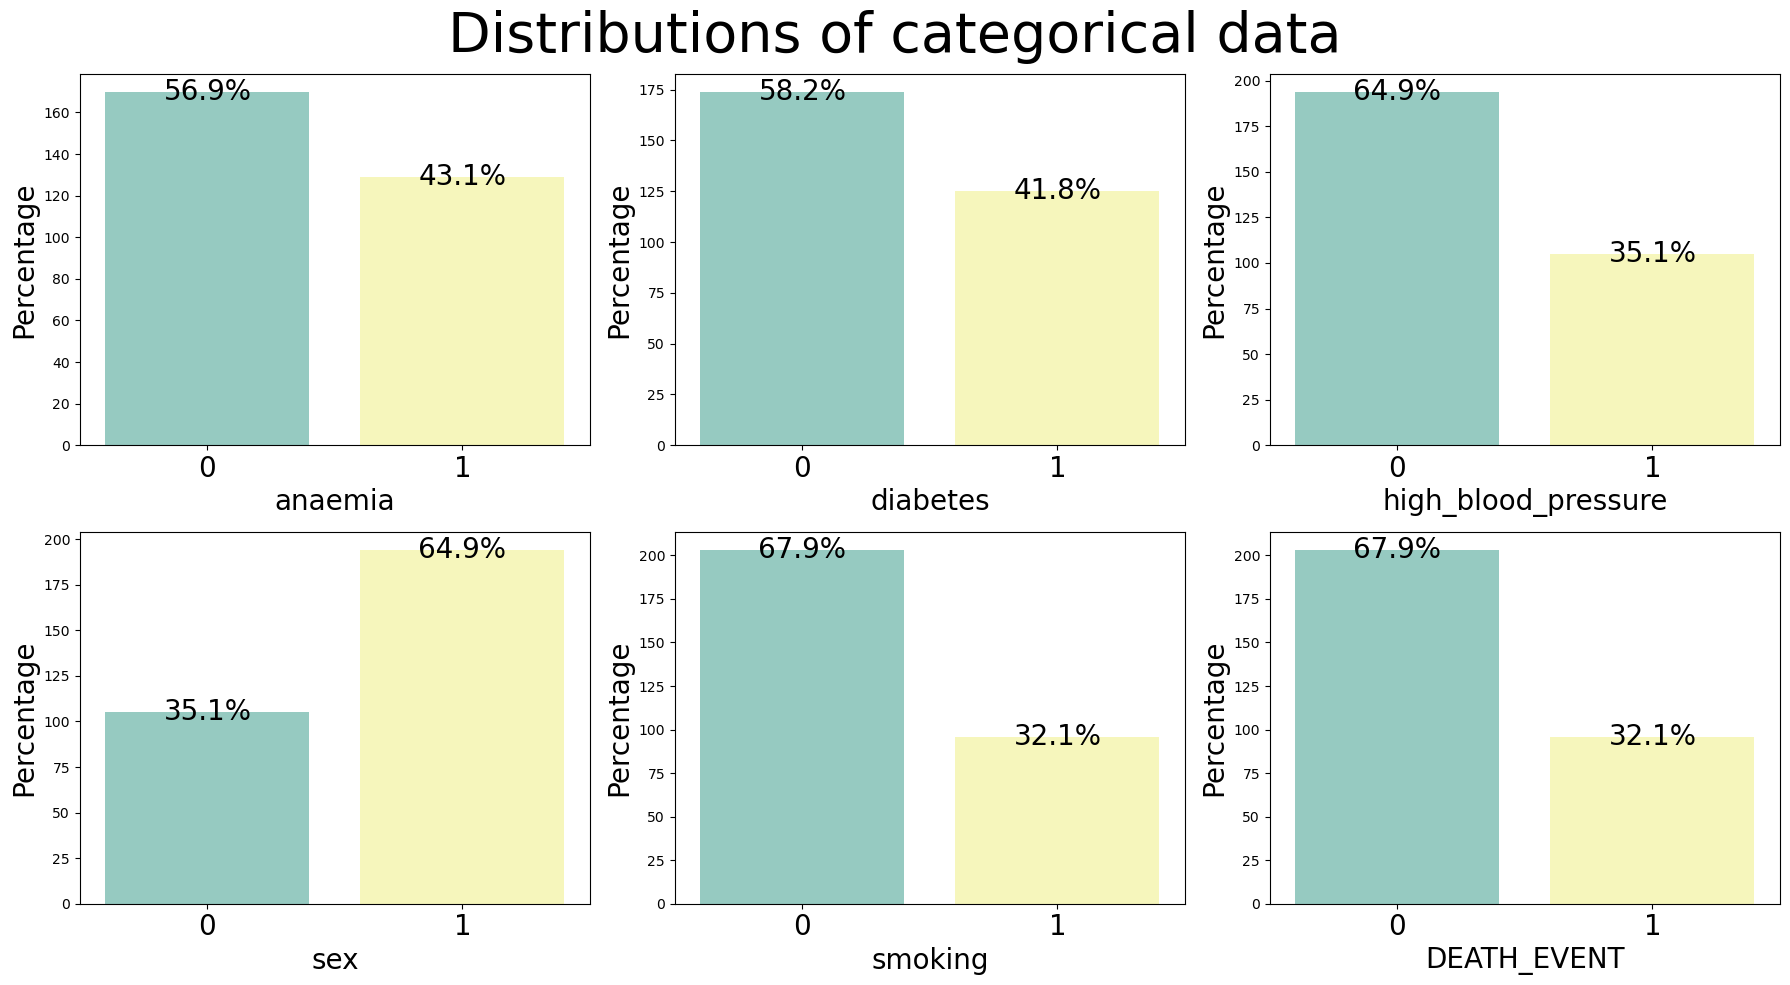

In [339]:
def plot_histogram(data_df):
# hsitogram
  plt.figure(figsize=(18,10))
  grid_size=(2,3)
  for i, col in enumerate(categorical_columns):
    plt.subplot(grid_size[0],grid_size[1],i+1)
    total_count=data_df[col].count()
    sns.countplot(x=col,data=data_df,palette='Set3')
    plt.xlabel(col,fontsize=20)
    plt.xticks(fontsize=20)
    plt.ylabel('Percentage', fontsize=20)
    for p in plt.gca().patches:
        percentage='{:.1f}%'.format(100*p.get_height()/total_count)
        plt.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', fontsize=20, color='black')
    plt.tight_layout()
    plt.suptitle('Distributions of categorical data',fontsize=40)
  plt.show()
plot_histogram(data_df)

##### Overview:

The dataset presents a comprehensive numeric breakdown of various population characteristics. 

Approximately 57% of the population is non-anemic, while the remaining 43% exhibit anemia. 

Around 58% are non-diabetic, with the remaining 42% being diabetic.

About 65% of the population does not suffer from hypertension due to high blood pressure, while the remaining 35% are affected by it. 

The gender distribution shows that 35% of the population are females, whereas 65% are males. Moreover, approximately 68% of the population are smokers, while 32% are non-smokers. 

Finally, it is observed that 68% of the population experienced mortality after heart failure, with the remaining 32% surviving the condition.

#### Age Distribution

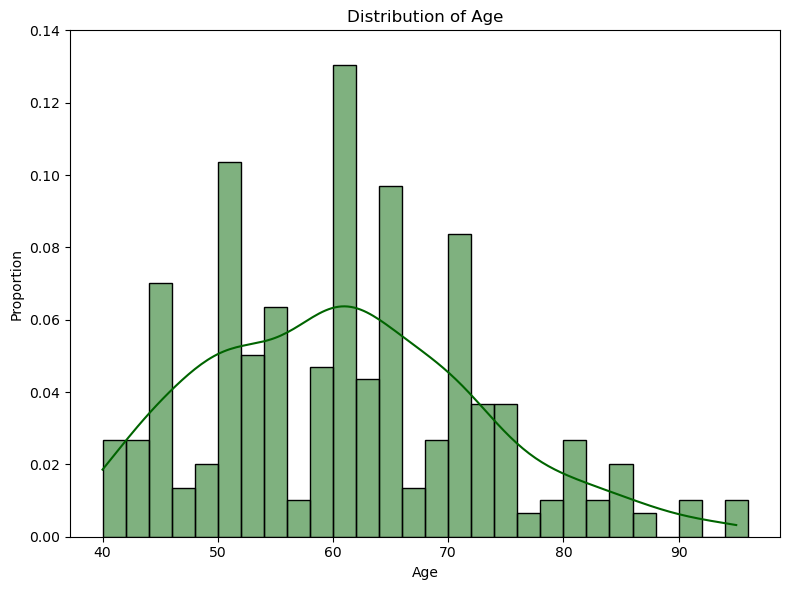

In [340]:
# define variable for age
data=data_df['age']
def plot_age_hist(data):
    plt.figure(figsize=(8,6))
    sns.histplot(data,kde=True,binwidth=2,color='darkgreen',stat='probability')
    plt.title('Distribution of Age')
    plt.xlabel('Age')
    plt.ylabel("Proportion")
    plt.ylim(0,0.14)
    plt.tight_layout()
    plt.show()
plot_age_hist(data)

##### Overview:

The dataset encompasses a population with ages ranging from 40 to 95 years old. 

Notably, there are distinct age spikes observed in the following 

intervals: 44-46, 50-52, 60-62, 64-66, and 70-72. These age spikes 

indicate higher concentrations of individuals within these specific age 

ranges.

#### Age Distribution by Gender

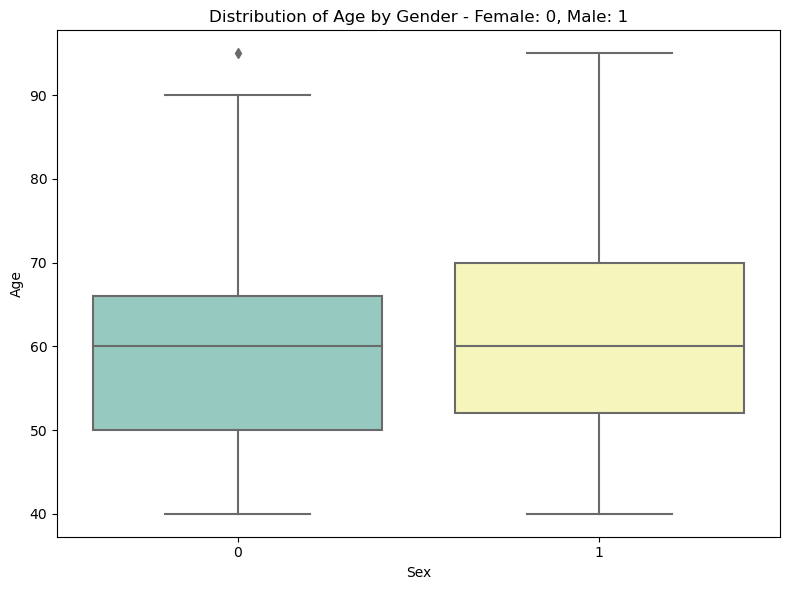

In [341]:
def plot_boxplot(data_df):
   plt.figure(figsize=(8,6))
   sns.boxplot(data=data_df,x='sex',y='age',palette='Set3')
   plt.title('Distribution of Age by Gender - Female: 0, Male: 1')
   plt.xlabel('Sex')
   plt.ylabel('Age')
   plt.tight_layout()
   plt.show()
plot_boxplot(data_df)


##### Overview:

The dataset covers a wide age range for both females and males, with the 

minimum age starting at 40 years. The maximum age for females is 90, while 

males have a maximum age of 95.

#### Survival Rate by Age

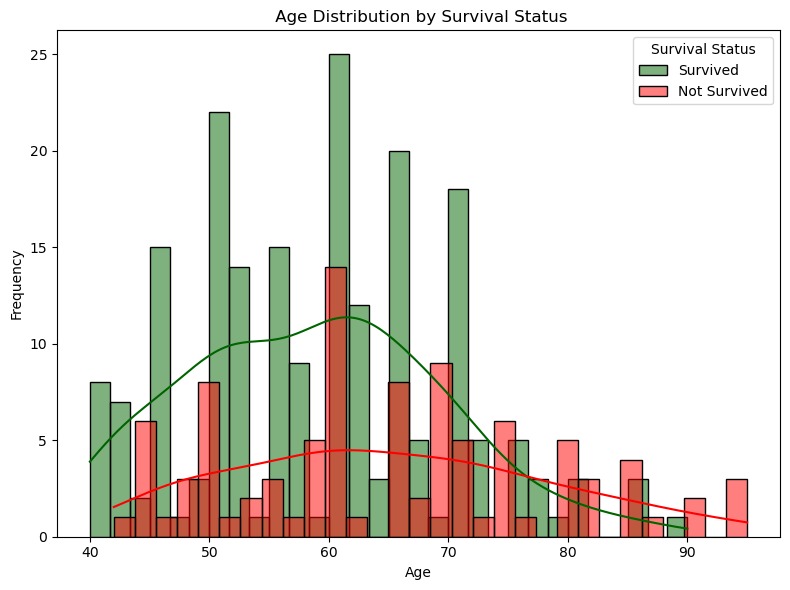

In [342]:
# Define Survival Status
survived=data_df[data_df['DEATH_EVENT']==0]['age']
not_survived=data_df[data_df['DEATH_EVENT']==1]['age']
def plot_survival_status(survived,not_survived):
    plt.figure(figsize=(8,6))
    sns.histplot(survived,bins=30,kde=True,alpha=0.5,label='Survived',color='darkgreen')
    sns.histplot(not_survived,bins=30,kde=True,alpha=0.5,label='Not Survived',color='red')
    plt.title(' Age Distribution by Survival Status')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.legend(title='Survival Status')
    plt.tight_layout()
    plt.show()
plot_survival_status(survived,not_survived)

##### Overview:

Heart failure survival is more common between ages 40 to 70, but decreases 
drastically after age 80. 

Non-survivors are distributed across various age groups, with the highest occurrence observed around age 60.

#### Survival Rate by Gender

In [343]:
male=data_df[data_df['sex']==1]
female=data_df[data_df['sex']==0]
male_survived=male[data_df['DEATH_EVENT']==0]
male_not_survived=male[data_df['DEATH_EVENT']==1]
female_survived=female[data_df['DEATH_EVENT']==0]
female_not_survived=female[data_df['DEATH_EVENT']==1]

In [344]:
labels=['Male Survived','Male Not Survived','Female Survived','Female Not Survived']
values=[len(male_survived),len(male_not_survived),len(female_survived),len(female_not_survived)]

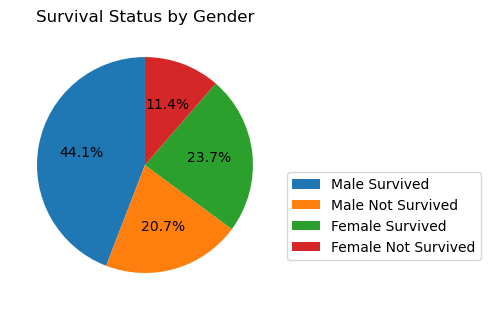

In [345]:
def plot_survival_by_gender(values):
    plt.figure(figsize=(5,5))
    plt.pie(values,autopct='%1.1f%%',startangle=90)
    plt.title('Survival Status by Gender')
    plt.legend(labels,loc='best',bbox_to_anchor=(1,0.5))
    plt.tight_layout()
    plt.show()
plot_survival_by_gender(values)

##### Overview:

In the dataset, 44.1% (132) of the male population survived after 

experiencing heart failure, while 20.7% (62) of the male population did 

not survive. For females, 23.7% (71) survived after their heart failure, 

while 11.4% (34) did not survive.

#### Survival Status and Anaemia

In [346]:
# Patients with anaemic condition
anaemic=data_df[data_df['anaemia']==1]
# Patients that are not anaemic
no_anaemic=data_df[data_df['anaemia']==0]
# Patients that anaemic and survived
anaemic_survived=anaemic[data_df['DEATH_EVENT']==0]
# Patients with anaemic and not survived
anaemic_not_survived=anaemic[data_df['DEATH_EVENT']==1]
# Patients that are not anaemic and survives
no_anaemic_survived=no_anaemic[data_df['DEATH_EVENT']==0]
# Patients that are not anaemic and not survived
no_anaemic_not_survived=no_anaemic[data_df['DEATH_EVENT']==1]

In [347]:
# Labels and Values
labels_anaemic=['Anaemic','Not Anaemic']
values_anaemic=[len(anaemic),len(no_anaemic)]
labels_survival_anaemic=['Anaemic - Survived','Anaemic- Not Survived',
                'Not Anaemic - Survived','Not Anaemic - Not Survived']
values_survival_anaemic=[len(anaemic_survived),len(anaemic_not_survived),
                len(no_anaemic_survived),len(no_anaemic_not_survived)]

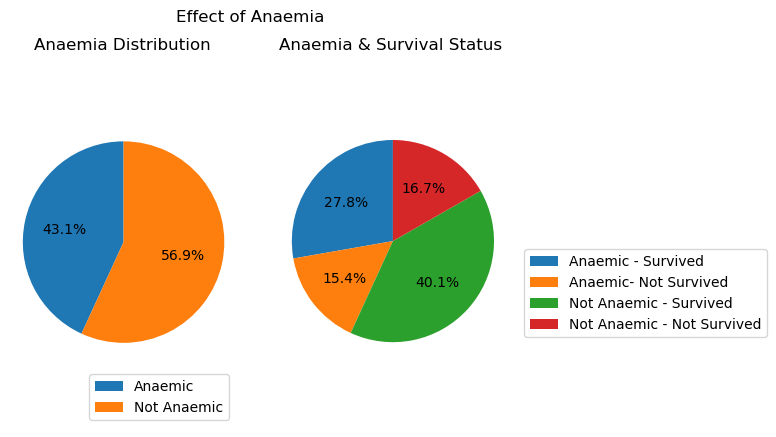

In [348]:
def plot_survival_by_anaemia(values_anaemic,values_survival_anaenic):
   fig,axs=plt.subplots(1,2)
   axs[0].pie(values_anaemic,autopct='%1.1f%%',startangle=90)
   axs[0].set_title('Anaemia Distribution')
   axs[0].axis('equal')
   axs[0].legend(labels_anaemic,loc='lower right')

   axs[1].pie(values_survival_anaemic,autopct='%1.1f%%',startangle=90)
   axs[1].set_title('Anaemia & Survival Status ')
   axs[1].axis('equal')
   axs[1].legend(labels_survival_anaemic,loc='best',bbox_to_anchor=(1.05,0.5))
   fig.suptitle('Effect of Anaemia')
   plt.show()
plot_survival_by_anaemia(values_anaemic,values_survival_anaemic)

##### Overview:


Among the population, 41.1% have anaemia, while 56.9% do not have anaemia.

Within the 43% of the population with anaemia, 27.8% survived, and 15.4% did not survive.

Among the 56.9% of the population without anaemia, 40.1% survived, and 16.7% passed away.

#### Survival Rate with respect to Diabets

In [349]:
# Daibetic Mellitus patients
DM=data_df[data_df['diabetes']==1]
# Patients not dabetic
NO_DM=data_df[data_df['diabetes']==0]
# Dabetic patients that survive
DM_survived=DM[data_df['DEATH_EVENT']==0]
DM_not_survived=DM[data_df['DEATH_EVENT']==1]
# NO Dabetic patients and survived
NO_DM_survived=NO_DM[data_df['DEATH_EVENT']==0]
# No Dabetic and not survived patients
NO_DM_not_survived=NO_DM[data_df['DEATH_EVENT']==1]

In [350]:
# Labels and Values
labels_DM=['DM','NO_DM']
values_DM=[len(DM),len(NO_DM)]
labels_survival_DM=['DM - Survived','DM - Not Survived',
                'No DM - Survived','No DM - Not Survived']
values_survival_DM=[len(DM_survived),len(DM_not_survived),
                len(NO_DM_survived),len(NO_DM_not_survived)]

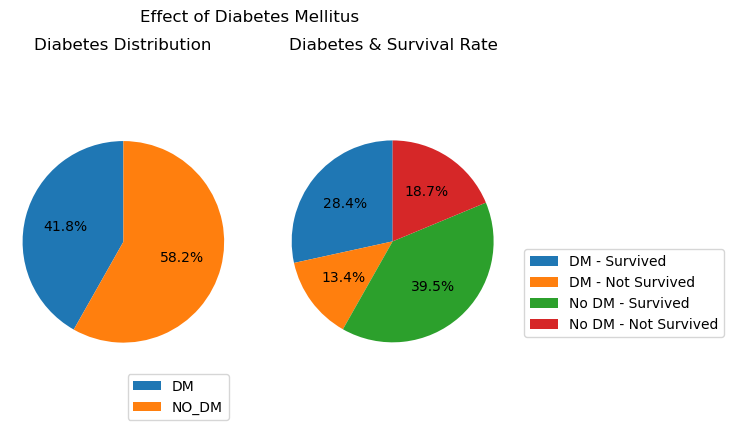

In [351]:
def plot_survival_by_DM(values_DM,values_survival_DM):
   fig,axs=plt.subplots(1,2)
   axs[0].pie(values_DM,autopct='%1.1f%%',startangle=90)
   axs[0].set_title('Diabetes Distribution')
   axs[0].axis('equal')
   axs[0].legend(labels_DM, loc='lower right')

   axs[1].pie(values_survival_DM,autopct='%1.1f%%',startangle=90)
   axs[1].set_title('Diabetes & Survival Rate')
   axs[1].axis('equal')
   axs[1].legend(labels_survival_DM,loc='best',bbox_to_anchor=(1.05,0.5))
   fig.suptitle('Effect of Diabetes Mellitus')
   plt.show()
plot_survival_by_DM(values_DM,values_survival_DM)

##### Overview:

In the population, 41.8% have Diabetes Mellitus (DM), while 58.2% do not have DM.

Among the population with DM, 28.4% survived, and 13.4% did not survive.

Among the population without DM, 39.5% survived, while 18.7% died.

High Blood Pressure effects on health

In [352]:
# Patients that has hypertension
HTN=data_df[data_df['high_blood_pressure']==1]
# Patients that has no hypertension
NO_HTN=data_df[data_df['high_blood_pressure']==0]
# Patients with HTN and Survived
HTN_survived=HTN[data_df['DEATH_EVENT']==0]
# Patients with HTN and not survived
HTN_not_survived=HTN[data_df['DEATH_EVENT']==1]
# Patients with no HTN and Survived
NO_HTN_survived=NO_HTN[data_df['DEATH_EVENT']==0]
# Patients with no HTN and not survived
NO_HTN_not_survived=NO_HTN[data_df['DEATH_EVENT']==1]

In [353]:
# Labels
labels_HTN=['HTN','No HTN']
labels_survival_HTN=['HTN - Survived','HTN - Not Survived',
                 'No HTN - Survived','No HTN - Not Survived']
values_HTN=[len(HTN),len(NO_HTN)]
values_survival_HTN=[len(HTN_survived),len(HTN_not_survived),
                 len(NO_HTN_survived),len(NO_HTN_not_survived)]

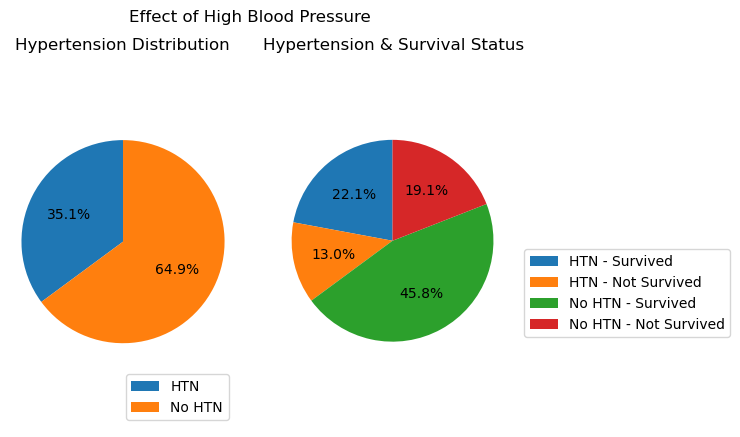

In [354]:
def plot_survival_by_hbp(values_HTN,values_survival_HTN):
   fig,axs=plt.subplots(1,2)
   axs[0].pie(values_HTN,autopct='%1.1f%%',startangle=90)
   axs[0].set_title('Hypertension Distribution')
   axs[0].axis('equal')
   axs[0].legend(labels_HTN,loc='lower right')
   axs[1].pie(values_survival_HTN,autopct='%1.1f%%',startangle=90)
   axs[1].set_title('Hypertension & Survival Status')
   axs[1].axis('equal')
   axs[1].legend(labels_survival_HTN,loc='best',bbox_to_anchor=(1.05,0.5))
   fig.suptitle('Effect of High Blood Pressure')
   plt.show()
plot_survival_by_hbp(values_HTN,values_survival_HTN)

##### Overview:

Among the population, 35.1% have hypertension due to high blood pressure (HTN), while 64.9% do not have HTN.

Within the population with HTN, 22.1% survived, and 13% did not survive.

Among the population without HTN, 45.8% survived, while 19.1% did not survive.

#### Effetc of Smoking on Health

In [355]:
# Patients with smoking habit
smoker=data_df[data_df['smoking']==1]
# Patients none smokers
no_smoker=data_df[data_df['smoking']==0]
# Patients who smoke and survived
smoker_survived=smoker[data_df['DEATH_EVENT']==0]
smoker_not_survived=smoker[data_df['DEATH_EVENT']==1]
no_smoker_survived=no_smoker[data_df['DEATH_EVENT']==0]
no_smoker_not_survived=no_smoker[data_df['DEATH_EVENT']==1]

In [356]:
# labels and values
labels_smoker=['smoker','Not Smoker']
values_smoker=[len(smoker),len(no_smoker)]
labels_survival=['Smoker - Survived','Smoker - Not Survived',
                'Not Smoker - Survived','Not Smoker - Not Survived']
values_survival=[len(smoker_survived),len(smoker_not_survived),
                len(no_smoker_survived),len(no_smoker_not_survived)]

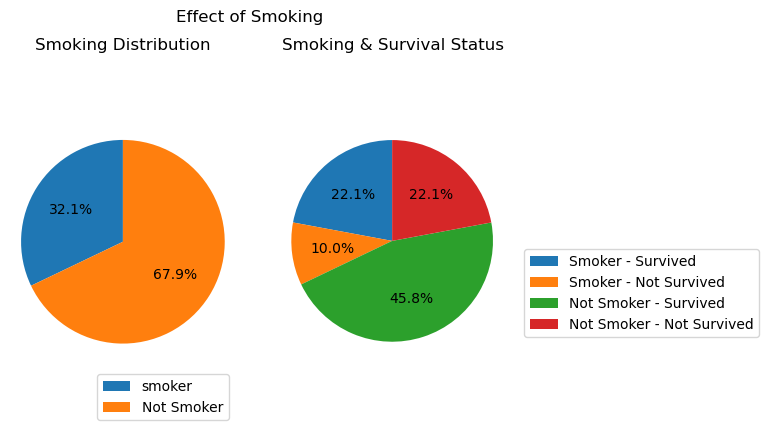

In [357]:
def plot_survival_by_smoker(values_smoker,values_survival):
   fig,axs=plt.subplots(1,2)
   axs[0].pie(values_smoker,autopct='%1.1f%%',startangle=90)
   axs[0].set_title('Smoking Distribution')
   axs[0].axis('equal')
   axs[0].legend(labels_smoker,loc='lower right')

   axs[1].pie(values_survival,autopct='%1.1f%%',startangle=90)
   axs[1].set_title('Smoking & Survival Status')
   axs[1].axis('equal')
   axs[1].legend(labels_survival, loc='best',bbox_to_anchor=(1.05,0.5))
   fig.suptitle('Effect of Smoking')
   plt.show()
plot_survival_by_smoker(values_smoker,values_survival) 

##### Overview:

Within the population, 32.1% are smokers, while 67.9% are non-smokers.

Among the smoker population, 22.1% survived, while 10% did not survive.

For the non-smoker population, 45.8% survived, while 22.1% died.


### Exploratory Data Analysis for Continuous Variables

 1. Creatinine Phosphorkinase(CPK)
 2. Ejection Fraction
 3. Platelets
 4. Serum Creatinine
 5. Serum Sodium

#### CPK levels with respect to survival status

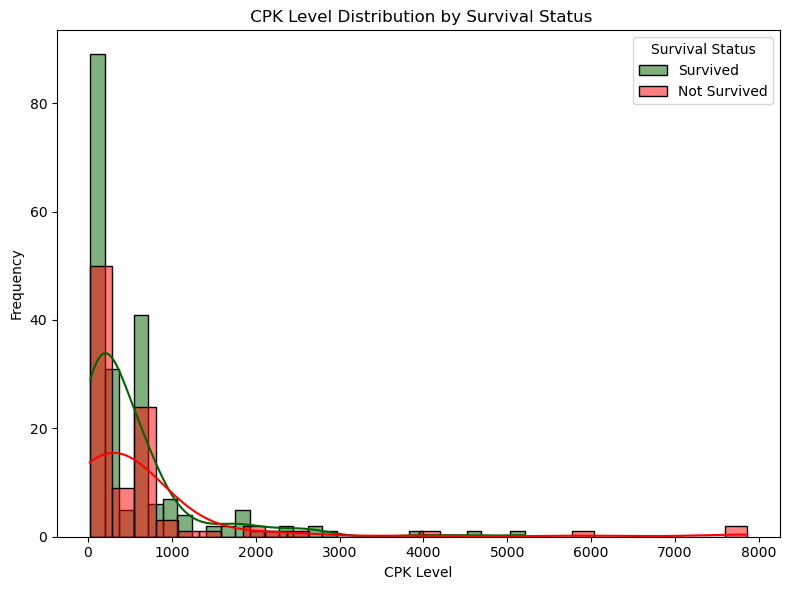

In [358]:
# Define survival status by cpk
cpk_survived=data_df[data_df['DEATH_EVENT']==0]['creatinine_phosphokinase']
cpk_not_survived=data_df[data_df['DEATH_EVENT']==1]['creatinine_phosphokinase']
def plot_survival_by_cpk(cpk_survived,cpk_not_survived):
    plt.figure(figsize=(8,6))
    sns.histplot(cpk_survived,bins=30,kde=True,alpha=0.5,label='Survived',color='darkgreen')
    sns.histplot(cpk_not_survived,bins=30,kde=True,alpha=0.5,label='Not Survived',color='red')
    plt.title(' CPK Level Distribution by Survival Status')
    plt.xlabel('CPK Level')
    plt.ylabel('Frequency')
    plt.legend(title='Survival Status')
    plt.tight_layout()
    plt.show()
plot_survival_by_cpk(cpk_survived,cpk_not_survived)

##### Overview:

Individuals who did not survive after heart failure tend to exhibit high values of CPK levels.

The CPK level data is right-skewed, indicating a higher frequency of lower values, with potential outliers present in the distribution.

#### Ejection Fraction with respect to Survival Status

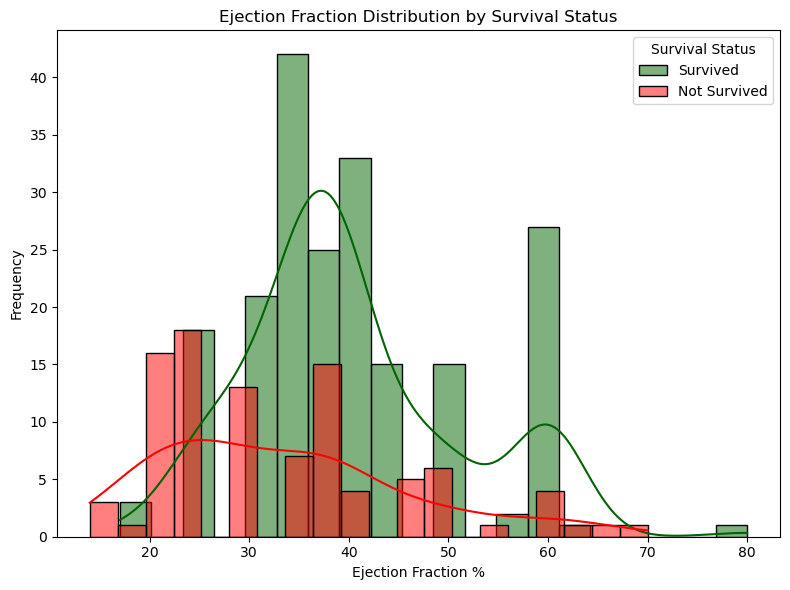

In [359]:
# Define survival status by Ejection Frcation
ef_survived=data_df[data_df['DEATH_EVENT']==0]['ejection_fraction']
ef_not_survived=data_df[data_df['DEATH_EVENT']==1]['ejection_fraction']
def plot_survival_by_ef(ef_survived,ef_not_survived):
    plt.figure(figsize=(8,6))
    sns.histplot(ef_survived,bins=20,kde=True,alpha=0.5,label='Survived',color='darkgreen')
    sns.histplot(ef_not_survived,bins=20,kde=True,alpha=0.5,label='Not Survived',color='red')
    plt.title('Ejection Fraction Distribution by Survival Status')
    plt.xlabel('Ejection Fraction %')
    plt.ylabel('Frequency')
    plt.legend(title='Survival Status')
    plt.tight_layout()
    plt.show()
plot_survival_by_ef(ef_survived,ef_not_survived)

##### Overview:

A significant portion of the 'Not Survived' population has an ejection fraction between 20 to 45, indicating values lower than the normal ejection fraction range (above 60%).

#### Platelets with respect to survival status

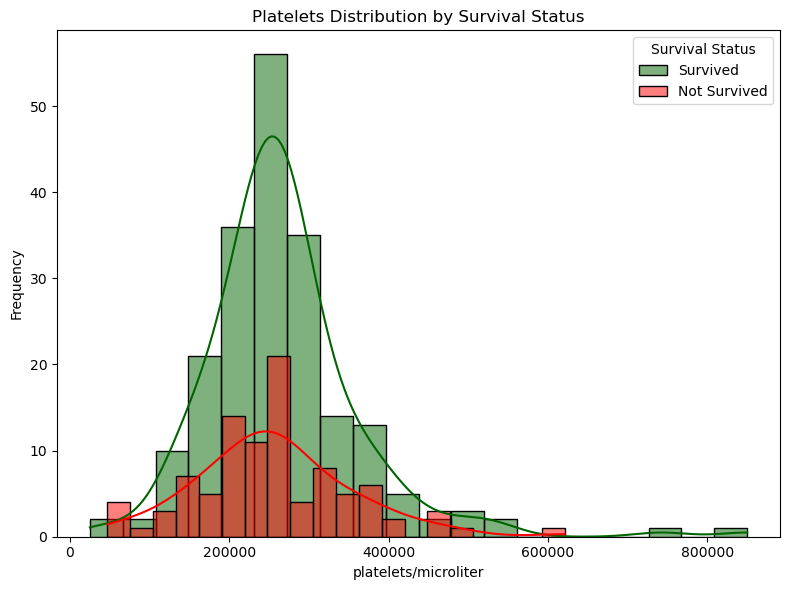

In [360]:
# Define survival status by platelets
platelets_survived=data_df[data_df['DEATH_EVENT']==0]['platelets']
platelets_not_survived=data_df[data_df['DEATH_EVENT']==1]['platelets']
def plot_survival_by_platelets(platelets_survived,platelets_not_survived):
    plt.figure(figsize=(8,6))
    sns.histplot(platelets_survived,bins=20,kde=True,alpha=0.5,label='Survived',color='darkgreen')
    sns.histplot(platelets_not_survived,bins=20,kde=True,alpha=0.5,label='Not Survived',color='red')
    plt.title('Platelets Distribution by Survival Status')
    plt.xlabel('platelets/microliter')
    plt.ylabel('Frequency')
    plt.legend(title='Survival Status')
    plt.tight_layout()
    plt.show()
plot_survival_by_platelets(platelets_survived,platelets_not_survived)

##### Overview:

The majority of individuals who did not survive after the heart failure condition have platelet counts within the normal range.

Both populations, survivors, and non-survivors, exhibit high platelet counts.

Outliers are prominently observed in cases where the patient survived the event of heart failure, indicating extreme values in platelet counts.

#### Serum Creatinine with respect to Survival Status

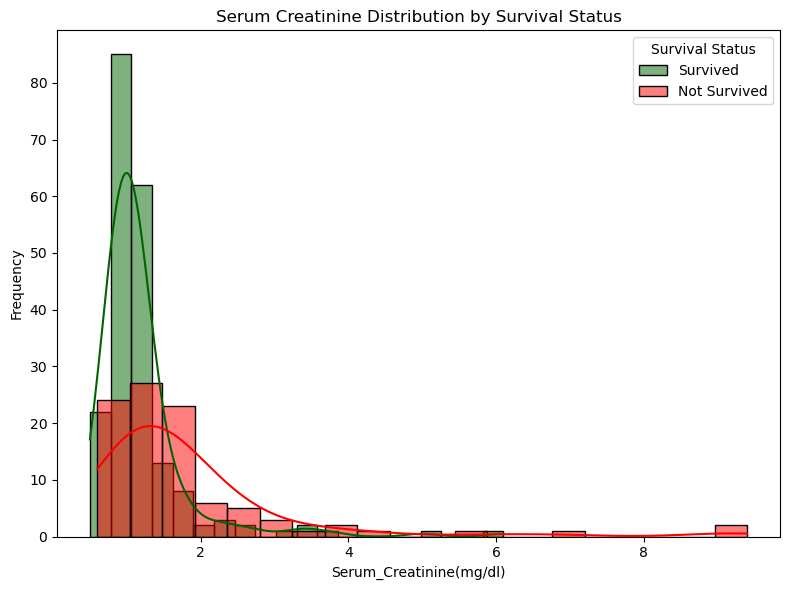

In [361]:
# Define Survival Status by Serum Creatinine 
sc_survived=data_df[data_df['DEATH_EVENT']==0]['serum_creatinine']
sc_not_survived=data_df[data_df['DEATH_EVENT']==1]['serum_creatinine']
# Plot histogram
def plot_survival_by_sc(sc_survived,sc_not_survived):
    plt.figure(figsize=(8,6))
    sns.histplot(sc_survived,bins=20,kde=True,alpha=0.5,label='Survived',color='darkgreen')
    sns.histplot(sc_not_survived,bins=20,kde=True,alpha=0.5,label='Not Survived',color='red')
    plt.title('Serum Creatinine Distribution by Survival Status')
    plt.xlabel('Serum_Creatinine(mg/dl)')
    plt.ylabel('Frequency')
    plt.legend(title='Survival Status')
    plt.tight_layout()
    plt.show()
plot_survival_by_sc(sc_survived,sc_not_survived)

##### Overview:

For a healthy person, the serum creatinine level falls within the range of 0.6 to 1.2 mg/dl for men and 0.5 to 1.1 mg/dl for women.

The population who did not survive after the heart failure condition tends to have a serum creatinine level larger than the normal range.

Clear outliers of serum creatinine are observed in the population who have not survived, indicating extreme values beyond the expected range.


#### Serum Sodium with respect to Survival Status

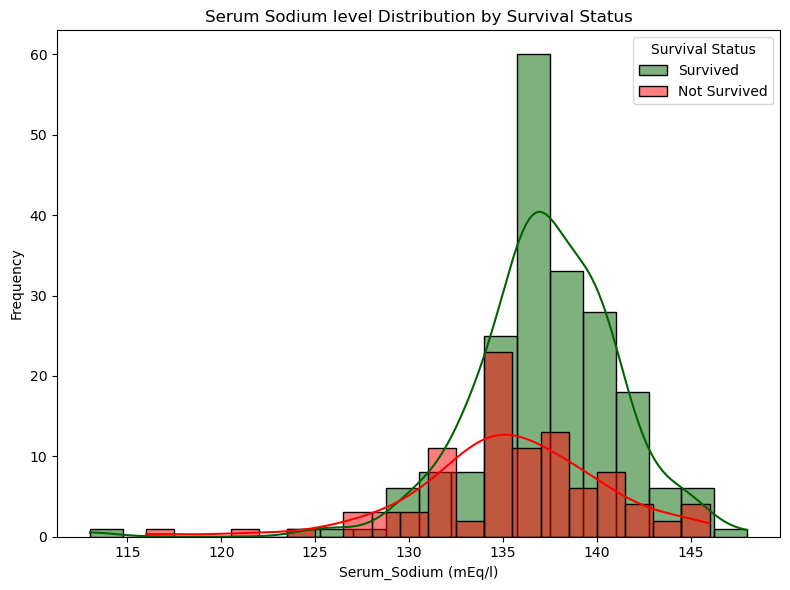

In [362]:
# Define Survival Status by Serum Sodium
ss_survived=data_df[data_df['DEATH_EVENT']==0]['serum_sodium']
ss_not_survived=data_df[data_df['DEATH_EVENT']==1]['serum_sodium']
# Plot
def plot_survival_by_ss(ss_survived,ss_not_survived):
    plt.figure(figsize=(8,6))
    sns.histplot(ss_survived,bins=20,kde=True,alpha=0.5,label='Survived',color='darkgreen')
    sns.histplot(ss_not_survived,bins=20,kde=True,alpha=0.5,label='Not Survived',color='red')
    plt.title('Serum Sodium level Distribution by Survival Status')
    plt.xlabel('Serum_Sodium (mEq/l)')
    plt.ylabel('Frequency')
    plt.legend(title='Survival Status')
    plt.tight_layout()
    plt.show()
plot_survival_by_ss(ss_survived,ss_not_survived)

##### Overview:

A normal blood sodium level ranges from 135 to 145 milliequivalents per liter (mEq/L).

The majority of the population, both survivors and non-survivors, had blood sodium levels within the normal range.

Clear outliers are observed below a blood sodium level of 125 mEq/L, indicating extremely low values beyond the normal range.

#### Data correlation

In [363]:
corr_matrix=data_df.corr()
corr_matrix

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


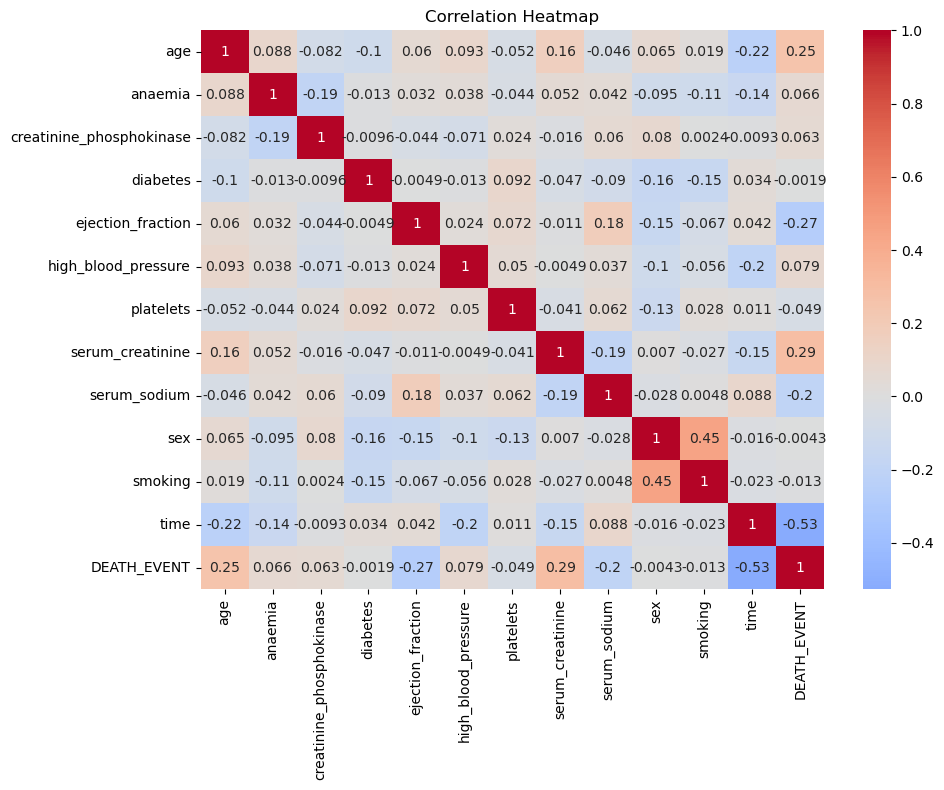

In [364]:
def plot_cormax(corr_matrix):
    plt.figure(figsize=(10,8))
    sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',center=0)
    plt.title('Correlation Heatmap')
    plt.tight_layout()
    plt.show()
plot_cormax(corr_matrix)

#### Feature(s) Selection

In [365]:
corr_matrix[(corr_matrix['DEATH_EVENT'].abs()>0.2) & (corr_matrix.index!='DEATH_EVENT')]['DEATH_EVENT']

age                  0.253729
ejection_fraction   -0.268603
serum_creatinine     0.294278
time                -0.526964
Name: DEATH_EVENT, dtype: float64

##### Overview:

Among the features, age, ejection fraction, serum creatinine, and time show a stronger correlation with the death event compared to other variables. These attributes seem to have a more significant impact on predicting the likelihood of death in the dataset.

#### Mutual Information

In [366]:
data_df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [367]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [368]:
features=['age','anaemia','creatinine_phosphokinase','diabetes',
       'ejection_fraction','high_blood_pressure','platelets',
       'serum_creatinine','serum_sodium','sex','smoking','time']

In [369]:
from sklearn.feature_selection import mutual_info_classif
mutual_infos=(mutual_info_classif(X=data_df[features],
                                y=data_df['DEATH_EVENT'],
                                n_neighbors=20,
                                random_state=42,
                                discrete_features=[False,True,False,True,False,
                                                   True,False,False,False,True,True,False]))
print("Mutual Information for each feature:", mutual_infos)

Mutual Information for each feature: [2.87276215e-02 2.18825400e-03 2.01466639e-02 1.88771122e-06
 7.61185233e-02 3.11536779e-03 0.00000000e+00 1.01390868e-01
 2.04892514e-02 9.30920961e-06 7.98743372e-05 2.31215290e-01]


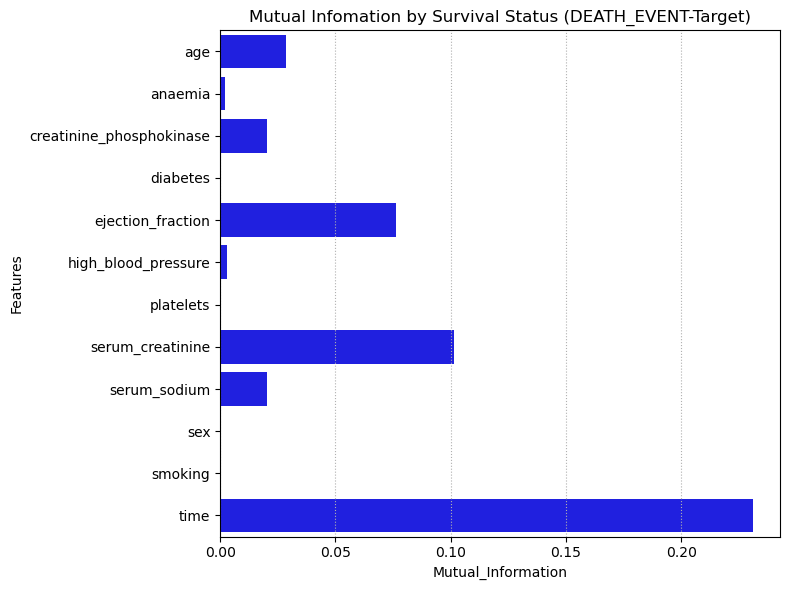

In [370]:
def plot_mutual_info(mutual_infos):
    plt.figure(figsize=(8,6))
    sns.barplot(x=mutual_infos,y=features,color='blue')
    plt.title('Mutual Infomation by Survival Status (DEATH_EVENT-Target)')
    plt.xlabel('Mutual_Information')
    plt.ylabel('Features')
    plt.gca().xaxis.grid(True,linestyle=':')
    plt.tight_layout()
    plt.show()
plot_mutual_info(mutual_infos)

##### Overview:

The features age, ejection fraction, serum creatinine, and time contain the highest amount of information, and the death event is highly dependent on these parameters. These variables seem to play a crucial role in predicting the likelihood of death in the dataset.

### Feature Engineering

In [371]:
# Split data into feature and target
x=data_df[['age','ejection_fraction','serum_creatinine','time']] # feature
y=data_df['DEATH_EVENT'] #Target
print('Original data shape',x.shape,y.shape)

Original data shape (299, 4) (299,)


In [372]:
# Split into testing and training
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)
print('Training set shape:',x_train.shape,y_train.shape)
print('Testing set shape:',x_test.shape,y_test.shape)

Training set shape: (269, 4) (269,)
Testing set shape: (30, 4) (30,)


In [373]:
# View Data distirbution on the training(y) set to make sure there is no class imbalance
print('class counts')
print(y_train.value_counts())
print('Distribution')
print(y_train.value_counts(normalize=True)*100)

class counts
0    185
1     84
Name: DEATH_EVENT, dtype: int64
Distribution
0    68.773234
1    31.226766
Name: DEATH_EVENT, dtype: float64


##### Overview:

The class distribution reveals that approximately 31% of the data corresponds to the death event (minority positive class), while the survival event accounts for 69% (majority negative class).

Due to this class imbalance, the model may lean towards learning and predicting the negative examples more than the positive cases.

To address this issue, it is essential to balance the dataset by generating more examples of the minority class, ensuring that the model learns effectively from both positive and negative cases.


### Balancing Classes Using Synthetic Minority Oversampling Technique(SMOTE)

In [374]:
#pip install imblearn

In [375]:
# Import
from imblearn.over_sampling import SMOTE
# Instantiate the SMOTE object
smote=SMOTE(random_state=42)
# Apply SMOTE to the training data
x_train,y_train=smote.fit_resample(x_train.values,y_train.values.ravel())

#### Shuffle

In [376]:
# Shuffle the data
perm=np.random.permutation(x_train.shape[0])
# Shuffle the resampled training labels based on the permutation
x_train=x_train[perm]
y_train=y_train[perm]
# convert them to data frame
x_train=pd.DataFrame(x_train)
y_train=pd.DataFrame(y_train)
print('Resampled and shuffled shape:')
print(x_train.shape)
print(y_train.shape)

Resampled and shuffled shape:
(370, 4)
(370, 1)


In [377]:
# View Data distirbution on the training(y) after SMOTE set to make sure there is no class imbalance
print('class counts on training set:')
print(y_train.value_counts())

print('Distribution on training set:')
print(y_train.value_counts(normalize=True)*100)

print('class counts on test set:')
print(y_test.value_counts())

print('Distribution on training set:')
print(y_test.value_counts(normalize=True)*100)

class counts on training set:
0    185
1    185
dtype: int64
Distribution on training set:
0    50.0
1    50.0
dtype: float64
class counts on test set:
0    18
1    12
Name: DEATH_EVENT, dtype: int64
Distribution on training set:
0    60.0
1    40.0
Name: DEATH_EVENT, dtype: float64


#### Data Normalization

In [378]:
from sklearn.preprocessing import StandardScaler
# Create a StandardScaler object
scaler = StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

##### Overview:

Following the application of SMOTE, the positive and negative classes in the training set are now balanced, with an equal number of examples for both the survival and non-survival scenarios.

As a result of this balanced dataset, the model will not be biased during the training phase, as it will encounter an equal number of examples for both survival and non-survival cases.

Additionally, after applying SMOTE, the dataset is shuffled and normalized, ensuring that the model is exposed to diverse and representative samples while being better prepared to learn from the data.


### Training Random Forest Regressor

In [379]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_jobs=1,
                         random_state=100)
model_rf=rf.fit(x_train,y_train.values.ravel())

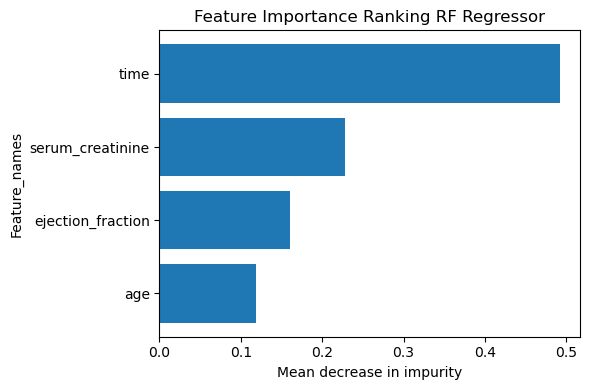

In [380]:
# Calculate feature importance
importance_rf=model_rf.feature_importances_
# Sort features in descending order
indices=np.argsort(importance_rf)[::1]
names=x.columns[indices]
# Plot
def plot_feature_imp_rf(importance_rf):
    plt.figure(figsize=(6,4))
    plt.barh(range(x.shape[1]),importance_rf[indices])
    plt.yticks(range(x.shape[1]),names)
    plt.title('Feature Importance Ranking RF Regressor')
    plt.xlabel('Mean decrease in impurity')
    plt.ylabel('Feature_names')
    plt.tight_layout()
    plt.show()
plot_feature_imp_rf(importance_rf)

##### Overview:

According to the analysis, time emerges as the most important feature in predicting the outcome, followed by serum creatinine, ejection fraction, and age in decreasing order of significance. These findings suggest that time plays a critical role in the prediction, while serum creatinine, ejection fraction, and age also contribute significantly to the overall model's predictive power.

### Train Support Vector Machines with Linear Kernel

In [381]:
from sklearn.svm import SVC
svm=SVC(kernel='linear',probability=True,random_state=0)
model_svm=svm.fit(x_train,y_train.values.ravel())

#### Feature Importances

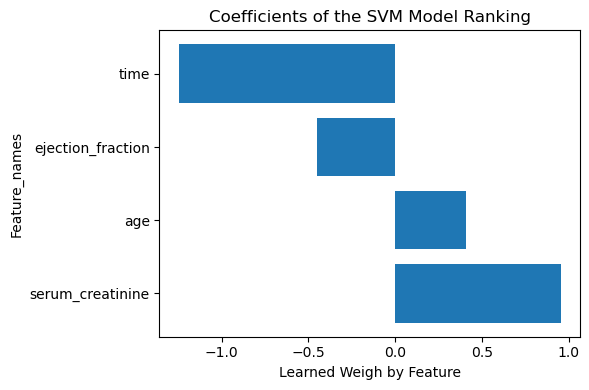

In [382]:
# Calculate feature importance by Coefficient
importance_svm=model_svm.coef_[0]
# Sort features in descending order
indices=np.argsort(importance_svm)[::-1]
names=x.columns[indices]
# Plot
def plot_feature_imp_svm(importance_svm):
    plt.figure(figsize=(6,4))
    plt.barh(range(x.shape[1]),importance_svm[indices])
    plt.yticks(range(x.shape[1]),names)
    plt.title('Coefficients of the SVM Model Ranking')
    plt.xlabel('Learned Weigh by Feature')
    plt.ylabel('Feature_names')
    plt.tight_layout()
    plt.show()
plot_feature_imp_svm(importance_svm)

##### Overview:

Time: 
Time stands out as the most significant feature with the highest negative coefficient. An increase in time is associated with a decrease in the probability of the positive class.

Ejection Fraction: 
Following Time, Ejection Fraction is the second most influential feature with a negative coefficient. Higher values of Ejection Fraction are associated with a lower likelihood of the positive class.

Serum Creatinine: 
Serum Creatinine holds the highest positive coefficient, making it a vital predictor. Increased levels of Serum Creatinine are associated with a higher probability of the positive class.

Age: 
Age ranks next in importance after Serum Creatinine with a positive coefficient. Higher ages are linked to a greater likelihood of the positive class.

### Hyperparameter Tuning Technique-Random Forest

In [383]:
from sklearn.model_selection import GridSearchCV
# Define the parameter grid
param_grid_rf={'max_depth':[0,1,2],
           'min_samples_leaf':[38,40,42],
           'min_samples_split':[60,70,80],
           'n_estimators':[5000,5500,6000]}

In [384]:
# Create the Random Forest Model
rf_model=RandomForestClassifier(random_state=42)
# Perform GridSearch
grid_search_rf=GridSearchCV(estimator=rf_model,
                         param_grid=param_grid_rf,
                        cv=5,n_jobs=-1)
# fitting the model for grid search
grid_search_rf.fit(x_train,y_train.values.ravel())
# get the best parameter from grid search
print('Best Parameters:',grid_search_rf.best_params_)
# get the best classifier model after hyper-parameter tuning
print('\nBest Classifier:',grid_search_rf.best_estimator_)


Best Parameters: {'max_depth': 2, 'min_samples_leaf': 38, 'min_samples_split': 60, 'n_estimators': 5000}

Best Classifier: RandomForestClassifier(max_depth=2, min_samples_leaf=38, min_samples_split=60,
                       n_estimators=5000, random_state=42)


### Hyperparameter Tuning Technique- Support Vector Machine

In [385]:
# Define the parameter grid
param_grid_svm={'C':[0.1,1,10,100],
           'kernel':['linear','poly','rbf'],
           'gamma':['scale','auto']}
# Instantiate the SVM classifier
svm_model=SVC(random_state=42,probability=True)
# Perfom Grid Search
grid_search_svm=GridSearchCV(estimator=svm_model,
                        param_grid=param_grid_svm,
                        cv=5,
                        n_jobs=-1)
# fitting the model for grid search
grid_search_svm.fit(x_train,y_train.values.ravel())
# get the best parameter from grid search
print('Best Parameters:',grid_search_svm.best_params_)
# get the best classifier model after hyper-parameter tuning
print('\nBest Classifier:',grid_search_svm.best_estimator_)

Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

Best Classifier: SVC(C=10, probability=True, random_state=42)


### Prediction with best Parameters-Random Forest

In [386]:
from sklearn.metrics import recall_score,accuracy_score,confusion_matrix,f1_score,matthews_corrcoef
from sklearn.metrics import precision_score,auc,roc_auc_score,roc_curve,precision_recall_curve,classification_report

In [387]:
# Assign the best classifiers estimators for RF
best_rf=grid_search_rf.best_estimator_
# Instantiating RandomizedSearchCV object
rf_opt=RandomForestClassifier(n_jobs=-1,random_state=42)
# Fit the optimized model
rf_opt=rf_opt.fit(x_train,y_train.values.ravel())
# Make predictions
y_pred_rf=rf_opt.predict(x_test)
# Get class probabilities 
y_pred_probs_rf=rf_opt.predict_proba(x_test)[:,1:]

### Prediction with best Parameters Support Vector Machines

In [388]:
# Assign the best classifiers estimators for SVM
best_svm=grid_search_svm.best_estimator_
# Fit the optimized model
best_svm.fit(x_train,y_train.values.ravel())
# Make predictions
y_pred_svm=best_svm.predict(x_test)
# get class probabilities
y_pred_probs_svm=best_svm.predict_proba(x_test)[:,1:].round(2)

### Model Evaluation-Random Forest

In [389]:
# Compute ROC and PR Curve for Random Forest preictions
fpr_rf,tpr_rf,thresholds_rf=roc_curve(y_test.values.ravel(),y_pred_rf)
precision_rf,recall_rf,th_rf=precision_recall_curve(y_test,y_pred_rf)

In [390]:
model_performance_rf=pd.DataFrame({"RandomForest Model Performance":[matthews_corrcoef(y_test,y_pred_rf).round(2),
                                                 accuracy_score(y_test,y_pred_rf).round(2),
                                                 precision_score(y_test,y_pred_rf).round(2),
                                                 recall_score(y_test,y_pred_rf).round(2),
                                                 f1_score(y_test,y_pred_rf).round(2),
                                                 auc(fpr_rf,tpr_rf).round(2),
                                                 auc(recall_rf,precision_rf).round(2)]},
                                                 
                                  index=['matthews_corrcoef_score','accuracy_score','precision_score','recall_score','f1_score','model_auc_roc','model_auc_pr'])
model_performance_rf

,RandomForest Model Performance
matthews_corrcoef_score,0.37
accuracy_score,0.70
precision_score,0.64
recall_score,0.58
f1_score,0.61
model_auc_roc,0.68
model_auc_pr,0.69


In [391]:
# Generate the classification
report_rf = classification_report(y_test, y_pred_rf)
# Convert the string to a DataFrame
class_report_rf = pd.DataFrame([line.split() for line in report_rf.split('\n')[2:-3]])
class_report_rf.columns = ['Class', 'Precision', 'Recall', 'F1-Score', 'Support']

print(class_report_rf)

      Class Precision Recall F1-Score Support
0         0      0.74   0.78     0.76      18
1         1      0.64   0.58     0.61      12
2      None      None   None     None    None
3  accuracy      0.70     30     None    None


### Model Evaluation-Support Vector Machines

In [392]:
# Compute ROC and PR Curve for Random Forest preictions
fpr_svm,tpr_svm,thresholds_svm=roc_curve(y_test.values.ravel(),y_pred_svm)
precision_svm,recall_svm,th_svm=precision_recall_curve(y_test,y_pred_svm)

In [393]:
model_performance_svm=pd.DataFrame({"Support Vector Machine Model Performance":
                                                 [matthews_corrcoef(y_test,y_pred_svm).round(2),
                                                 accuracy_score(y_test,y_pred_svm).round(2),
                                                 precision_score(y_test,y_pred_svm).round(2),
                                                 recall_score(y_test,y_pred_svm).round(2),
                                                 f1_score(y_test,y_pred_svm).round(2),
                                                 auc(fpr_svm,tpr_svm).round(2),
                                                 auc(recall_svm,precision_svm).round(2)]},
                                                 
                                  index=['matthews_corrcoef_score','accuracy_score','precision_score','recall_score','f1_score','model_auc_roc','model_auc_pr'])
model_performance_svm

,Support Vector Machine Model Performance
matthews_corrcoef_score,0.23
accuracy_score,0.63
precision_score,0.55
recall_score,0.50
f1_score,0.52
model_auc_roc,0.61
model_auc_pr,0.62


In [394]:
# Generate the classification
report_svm = classification_report(y_test, y_pred_svm)
# Convert the string to a DataFrame
class_report_svm = pd.DataFrame([line.split() for line in report_svm.split('\n')[2:-3]])
class_report_rf.columns = ['Class', 'Precision', 'Recall', 'F1-Score', 'Support']

print(class_report_svm)

          0     1     2     3     4
0         0  0.68  0.72  0.70    18
1         1  0.55  0.50  0.52    12
2      None  None  None  None  None
3  accuracy  0.63    30  None  None


In [395]:
conf_max_rf=confusion_matrix(y_test,y_pred_rf)
print(conf_max_rf)

[[14  4]
 [ 5  7]]


In [396]:
conf_max_svm=confusion_matrix(y_test,y_pred_svm)
print(conf_max_svm)

[[13  5]
 [ 6  6]]


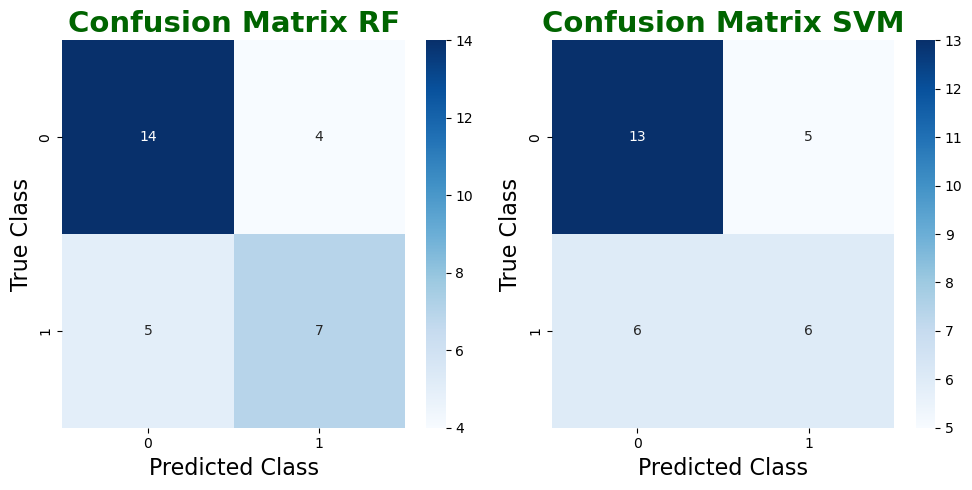

In [397]:
# Display the Confusion Matrix
def plot_conf_max_rf_svm(conf_max_rf,conf_max_svm):
# Plot Random Forest confusion matrix on the first subplot
    fig,axes=plt.subplots(1,2,figsize=(10,5))
    sns.heatmap(conf_max_rf,annot=True,fmt='d',cmap='Blues',ax=axes[0])
    axes[0].set_title('Confusion Matrix RF', fontsize=21,color='darkgreen',weight='bold')
    axes[0].set_xlabel('Predicted Class',fontsize=16)
    axes[0].set_ylabel('True Class',fontsize=16)

    # Plot SVM confusion matrix on the second subplot
    sns.heatmap(conf_max_svm,annot=True,fmt='d',cmap='Blues',ax=axes[1])
    axes[1].set_title('Confusion Matrix SVM',fontsize=21,color='darkgreen',weight='bold')
    axes[1].set_xlabel('Predicted Class',fontsize=16)
    axes[1].set_ylabel('True Class',fontsize=16)
    plt.tight_layout()
    plt.show()
plot_conf_max_rf_svm(conf_max_rf,conf_max_svm)

##### Overview:

In the Random Forest model, it correctly predicted 14 positive cases (True Positives) and 7 negative cases (True Negatives). However, it made 4 incorrect predictions of positive cases (False Positives) and 5 incorrect predictions of negative cases (False Negatives).

On the other hand, the SVM model accurately predicted 13 positive cases (True Positives) and 6 negative cases (True Negatives). Nonetheless, it misclassified 5 negative cases as positive (False Positives) and 6 positive cases as negative (False Negatives).

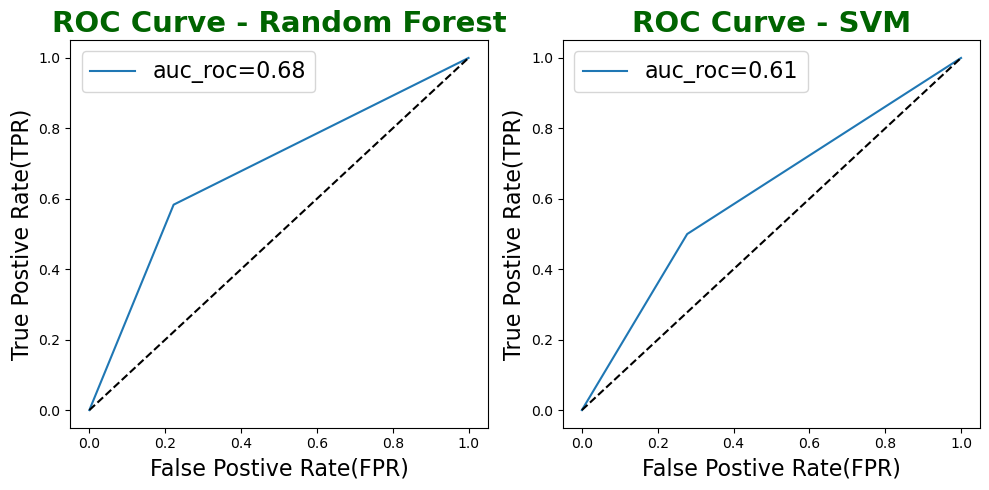

In [398]:
def plot_roc_curve(fpr_rf,tpr_rf,fpr_svm,tpr_svm):
# Create a 1X2 grid of subplots
  fig,axes=plt.subplots(1,2,figsize=(10,5))
# Plot ROC curve for Roandom Forest
  sns.lineplot(fpr_rf,tpr_rf,label='auc_roc=0.68',ax=axes[0])
  axes[0].plot([0,1],[0,1],'k--')
  axes[0].set_xlabel('False Postive Rate(FPR)',fontsize=16)
  axes[0].set_ylabel('True Postive Rate(TPR)',fontsize=16)
  axes[0].set_title('ROC Curve - Random Forest',fontsize=21,color='darkgreen',weight='bold')
  axes[0].legend(fontsize=16)
# Plot ROC curve for SVM
  sns.lineplot(fpr_svm,tpr_svm,label='auc_roc=0.61',ax=axes[1])
  axes[1].plot([0,1],[0,1],'k--')
  axes[1].set_xlabel('False Postive Rate(FPR)',fontsize=16)
  axes[1].set_ylabel('True Postive Rate(TPR)',fontsize=16)
  axes[1].set_title('ROC Curve - SVM',fontsize=21,color='darkgreen',weight='bold')
  axes[1].legend(fontsize=16)
  plt.tight_layout()
  plt.show()
plot_roc_curve(fpr_rf,tpr_rf,fpr_svm,tpr_svm)


##### Summary of AUC-ROC Scores for Random Forest and SVM:

The AUC-ROC (Area Under the Receiver Operating Characteristic) score is a metric used to evaluate the performance of binary classification models. It measures the ability of the model to distinguish between positive and negative cases. A higher AUC-ROC score indicates better discrimination capability.

Random Forest: 

The AUC-ROC score for the Random Forest model is 0.68. It suggests that the model has reasonably good discriminatory power in distinguishing between positive and negative cases.

SVM: 

The AUC-ROC score for the SVM model is 0.61. It indicates that the SVM model performs decently in distinguishing between positive and negative cases, but its discrimination capability is lower compared to the Random Forest.

As the AUC-ROC score for the Random Forest (0.68) is higher than the SVM (0.61), the Random Forest model shows better overall performance in terms of discriminating between positive and negative cases in the binary classification task.

### Conclusion

In [399]:
print(model_performance_rf)
print(model_performance_svm)

                         RandomForest Model Performance
matthews_corrcoef_score                            0.37
accuracy_score                                     0.70
precision_score                                    0.64
recall_score                                       0.58
f1_score                                           0.61
model_auc_roc                                      0.68
model_auc_pr                                       0.69
                         Support Vector Machine Model Performance
matthews_corrcoef_score                                      0.23
accuracy_score                                               0.63
precision_score                                              0.55
recall_score                                                 0.50
f1_score                                                     0.52
model_auc_roc                                                0.61
model_auc_pr                                                 0.62


##### Summary of Key Findings:

The analysis revealed several significant findings related to heart failure and the prediction of death events. The features 'age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', and 'time' were identified as closely related to the occurrence of death in heart failure patients. These attributes emerged as critical predictors, enabling accurate assessment of the risk associated with the heart failure condition.

Furthermore, the study emphasized that age plays a pivotal role in the prognosis of heart failure. Older age groups are more susceptible to fatal outcomes, highlighting the importance of age as a crucial risk factor. Physicians and healthcare providers should consider age as a key consideration when managing heart failure patients and administering personalized treatment plans.

The investigation also shed light on the impact of abnormal levels of 'ejection_fraction', 'serum_creatinine', and 'serum_sodium' in triggering heart failure. These parameters were found to significantly influence the development and severity of heart failure, necessitating close monitoring and early interventions to mitigate risks.

In terms of modeling, the Random Forest algorithm exhibited superior performance in predicting death events associated with cardiovascular conditions. This machine learning model demonstrated the potential to aid healthcare professionals in making informed decisions and taking prompt actions for patients at higher risk of death due to heart failure.

The study highlighted the time-saving benefits of machine learning models, streamlining the prediction process and providing additional support in critical care settings. By leveraging the model, medical practitioners can prioritize patients who are at greater risk and optimize resource allocation for improved patient outcomes.

The data imbalance issue was addressed through the application of the SMOTE technique, which balanced the dataset and improved model performance. However, the study acknowledged that additional data is essential for further enhancing accuracy and real-time applicability. Expanding the dataset will empower the model to make more informed decisions and respond effectively to a wider range of heart failure scenarios.

In conclusion, the research underscored the importance of the identified features in predicting death events associated with heart failure. By leveraging advanced machine learning models and addressing data imbalances, the study showcased the potential of these models in optimizing patient care, supporting clinical decision-making, and ultimately improving outcomes for individuals affected by heart failure.

### Appendix I - EDA

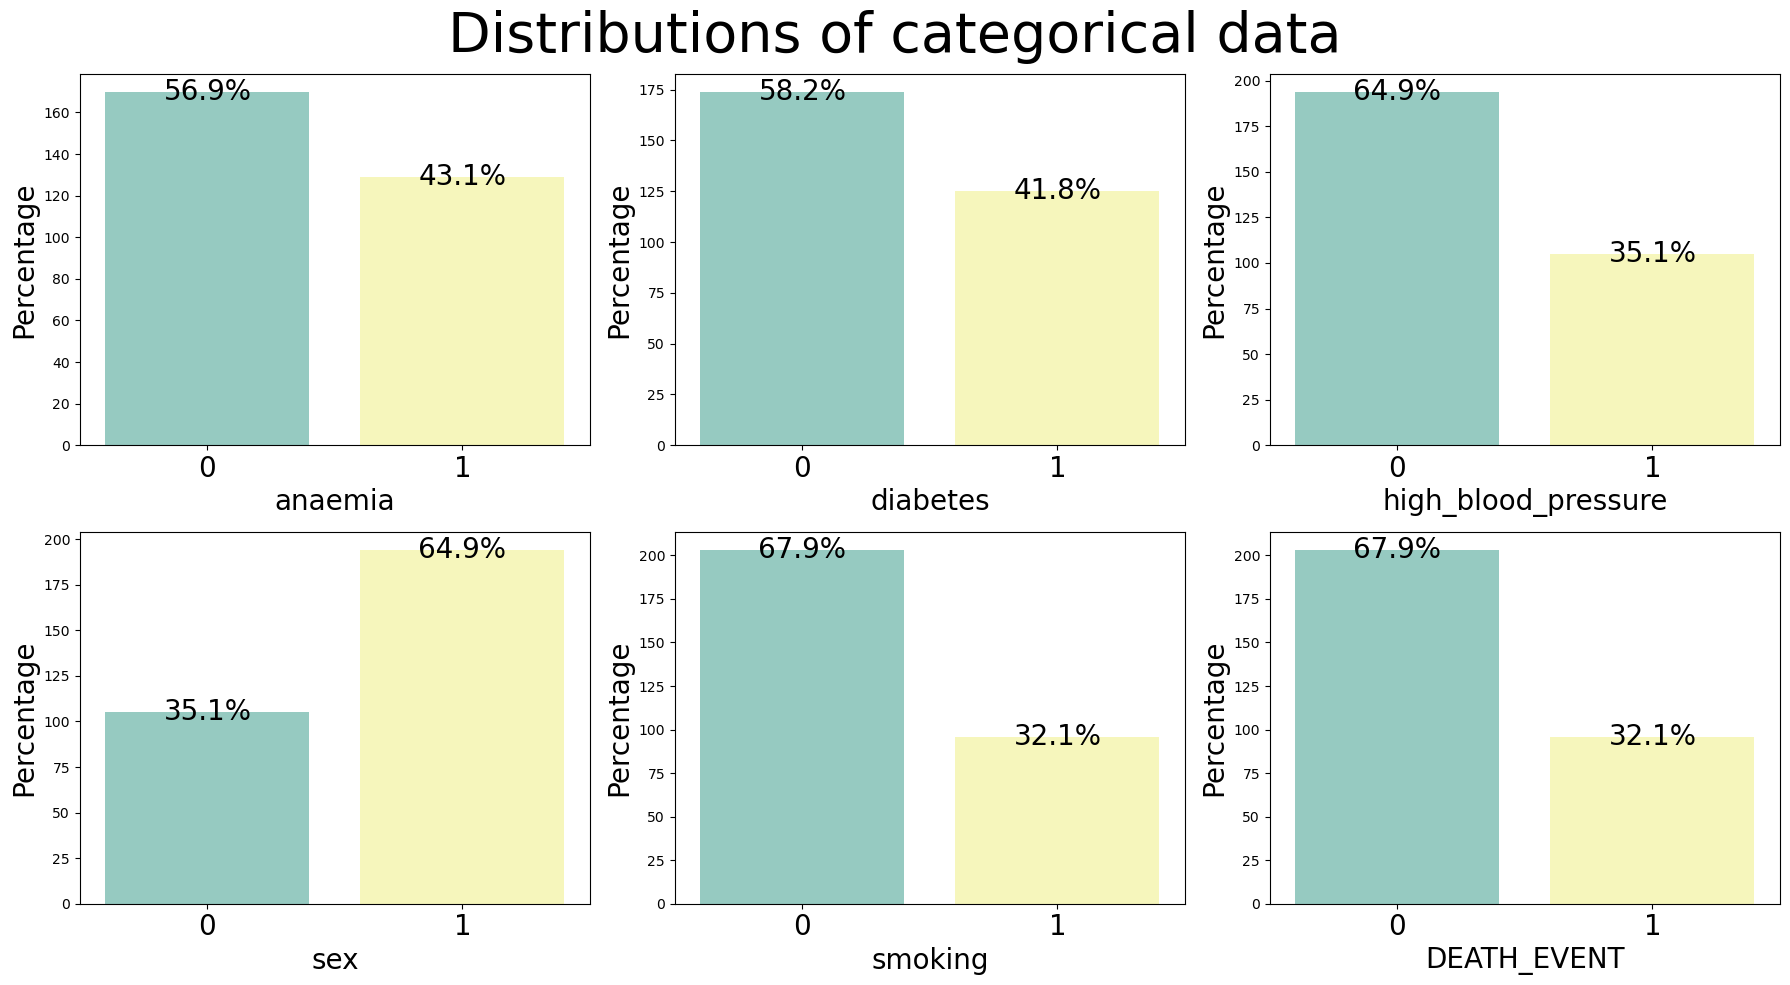

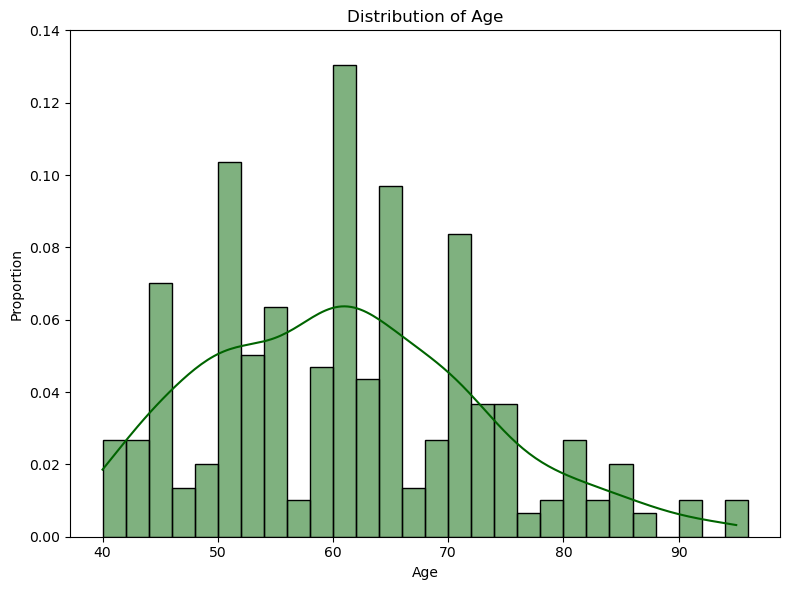

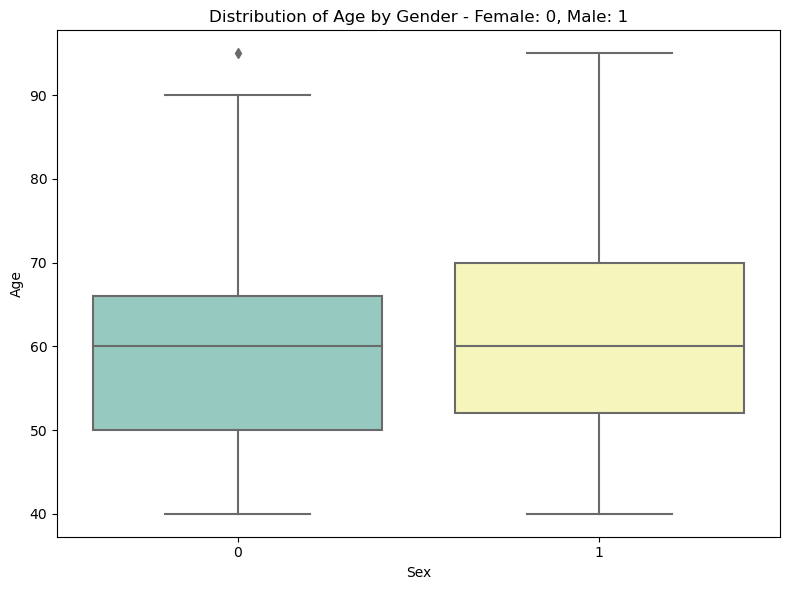

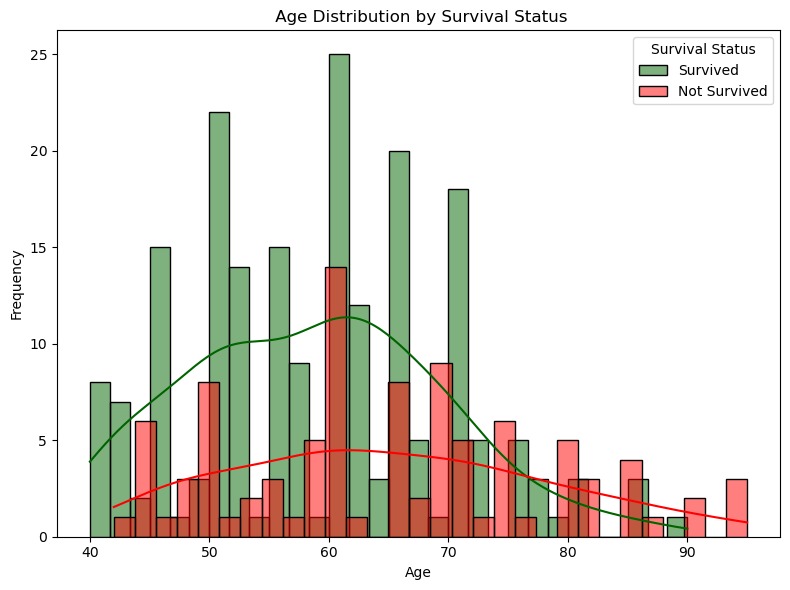

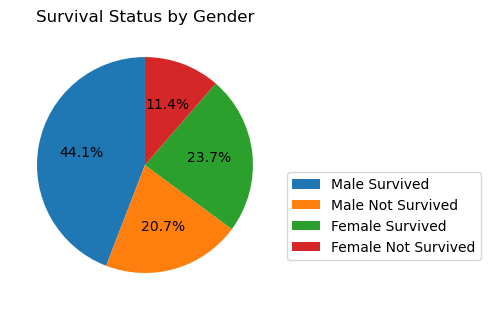

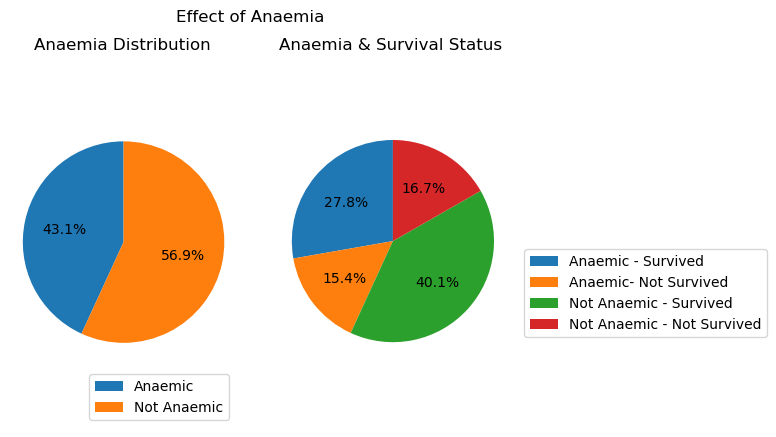

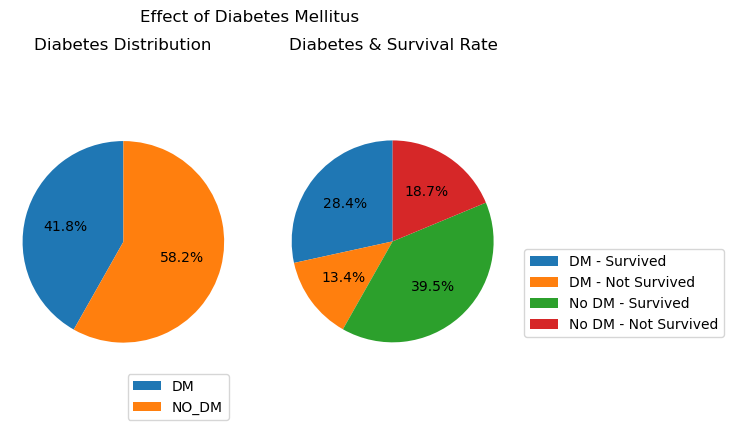

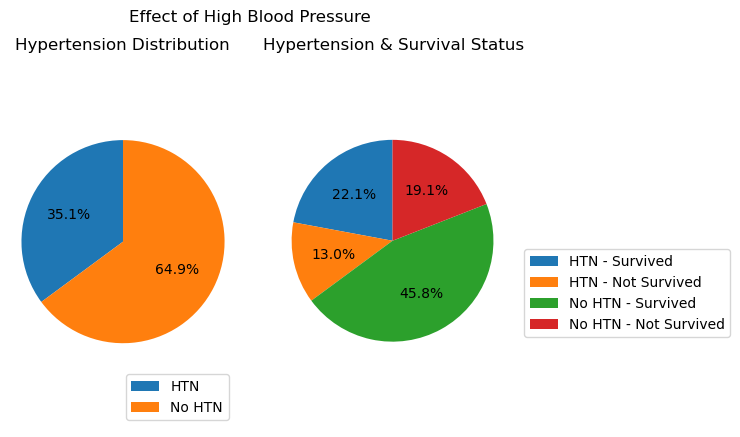

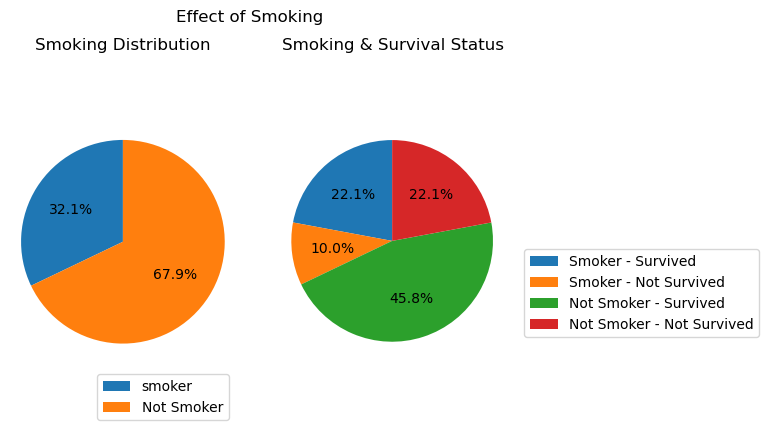

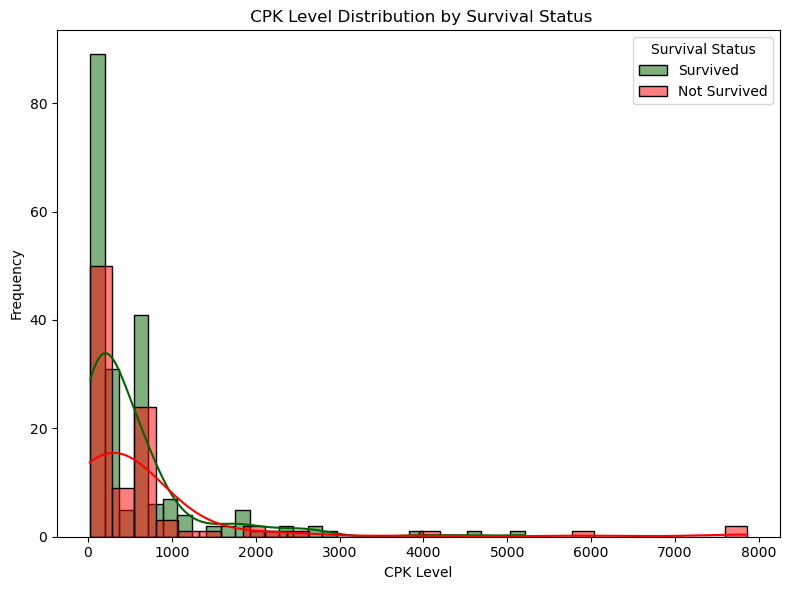

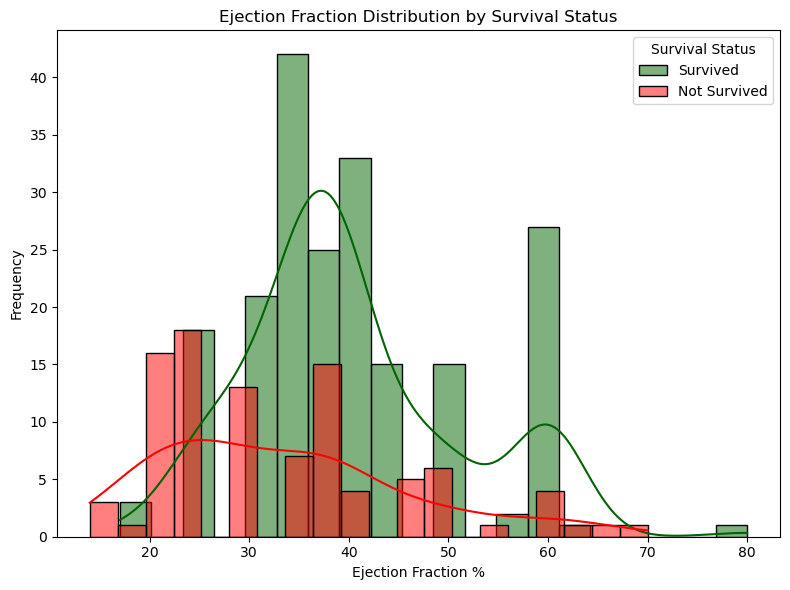

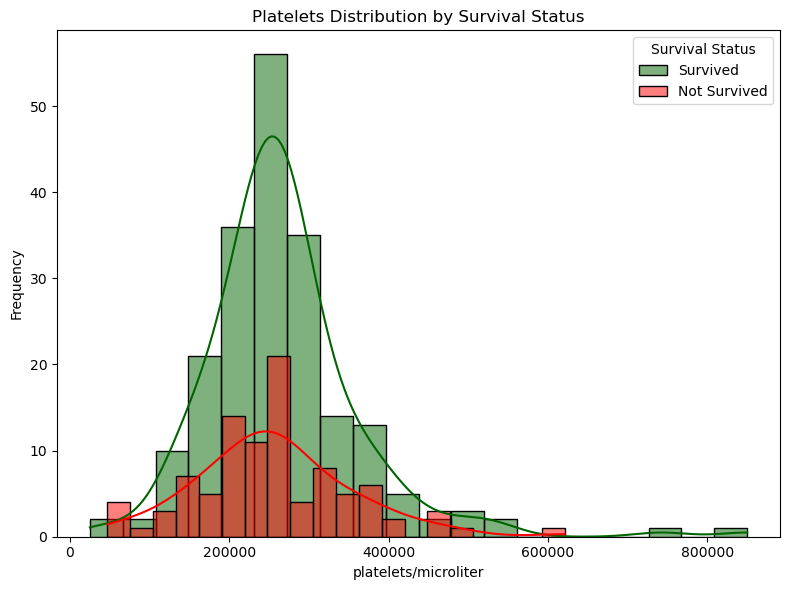

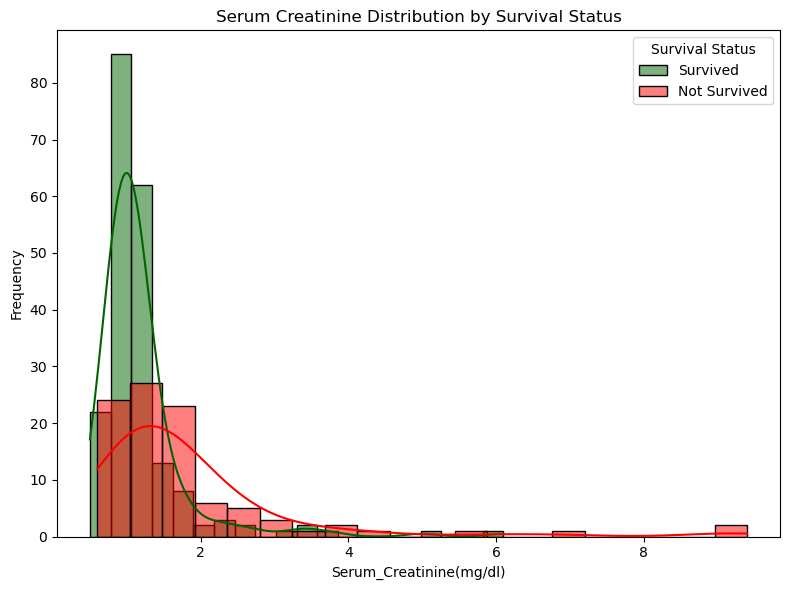

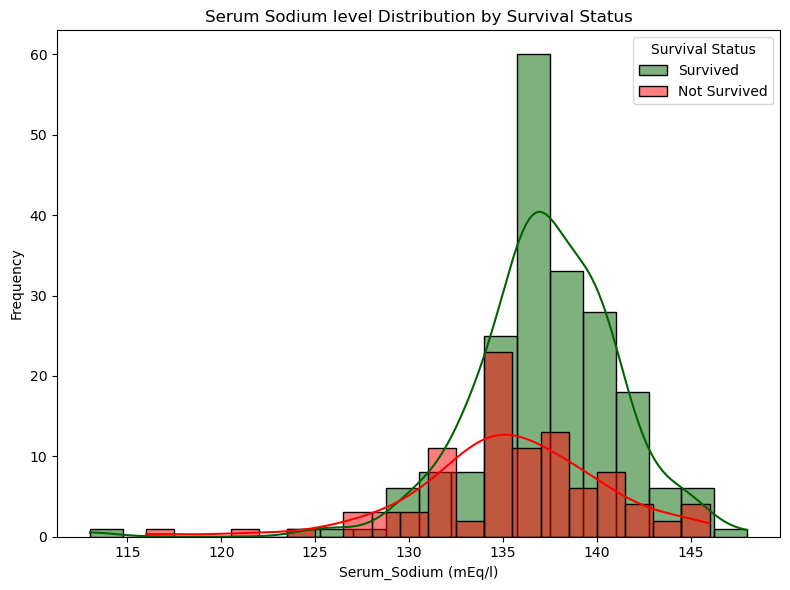

In [400]:
plot_histogram(data_df)
plot_age_hist(data)
plot_boxplot(data_df)
plot_survival_status(survived,not_survived)
plot_survival_by_gender(values)
plot_survival_by_anaemia(values_anaemic,values_survival_anaemic)
plot_survival_by_DM(values_DM,values_survival_DM)
plot_survival_by_hbp(values_HTN,values_survival_HTN)
plot_survival_by_smoker(values_smoker,values_survival)
plot_survival_by_cpk(cpk_survived,cpk_not_survived)
plot_survival_by_ef(ef_survived,ef_not_survived)
plot_survival_by_platelets(platelets_survived,platelets_not_survived)
plot_survival_by_sc(sc_survived,sc_not_survived)
plot_survival_by_ss(ss_survived,ss_not_survived)

### Appendix II - Feature Selection

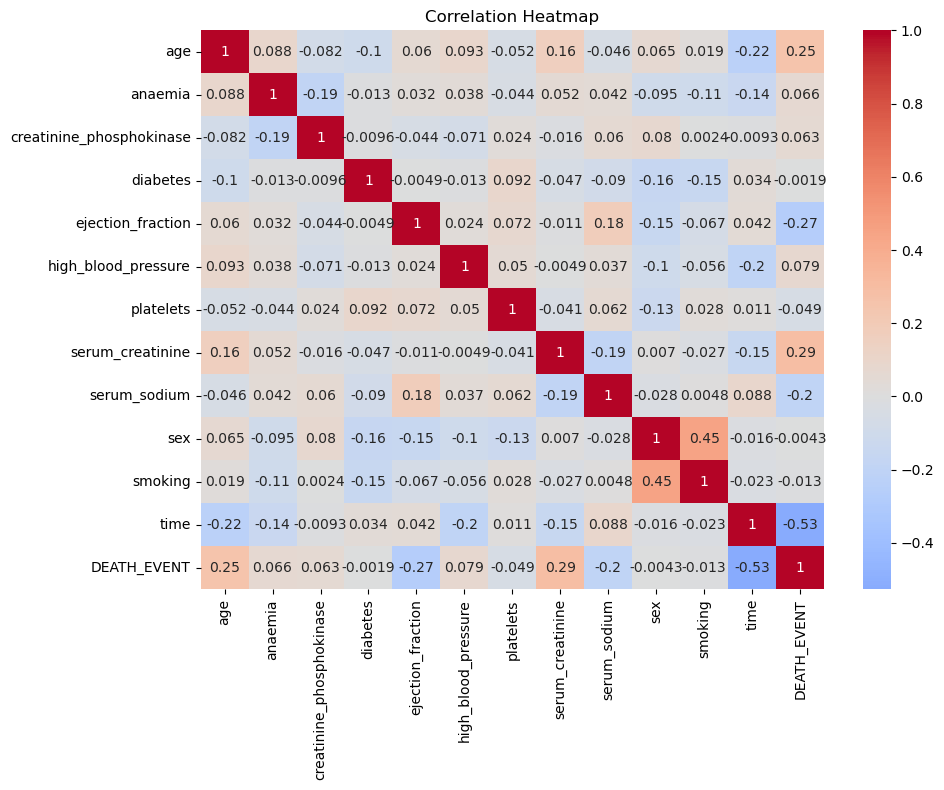

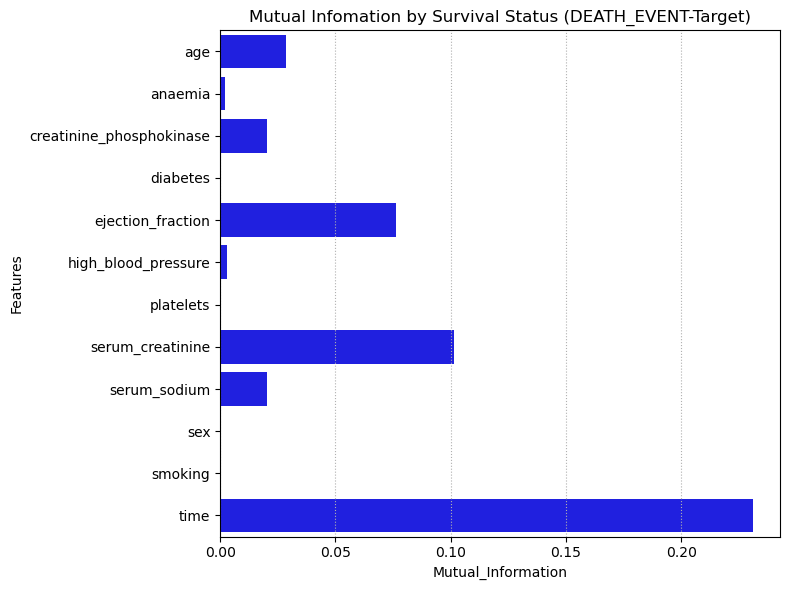

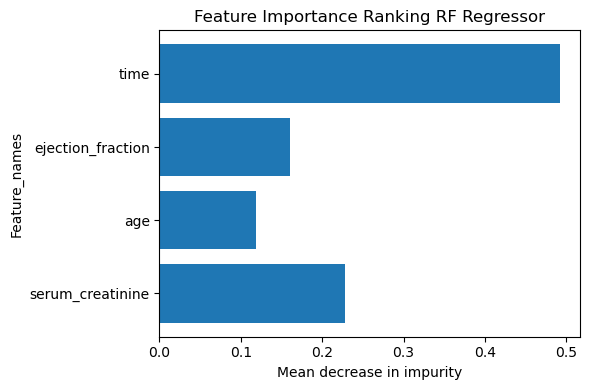

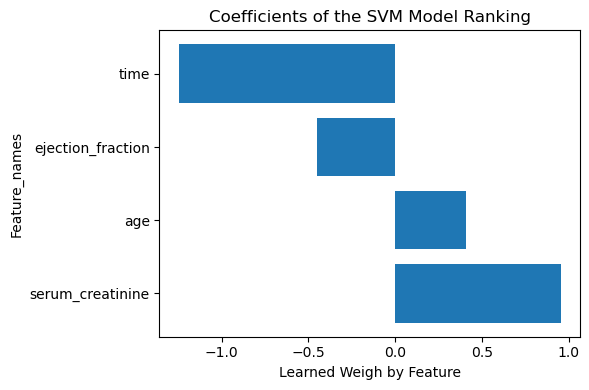

In [401]:
plot_cormax(corr_matrix)
plot_mutual_info(mutual_infos)
plot_feature_imp_rf(importance_rf)
plot_feature_imp_svm(importance_svm)

### Appendix III - Model Evaluation

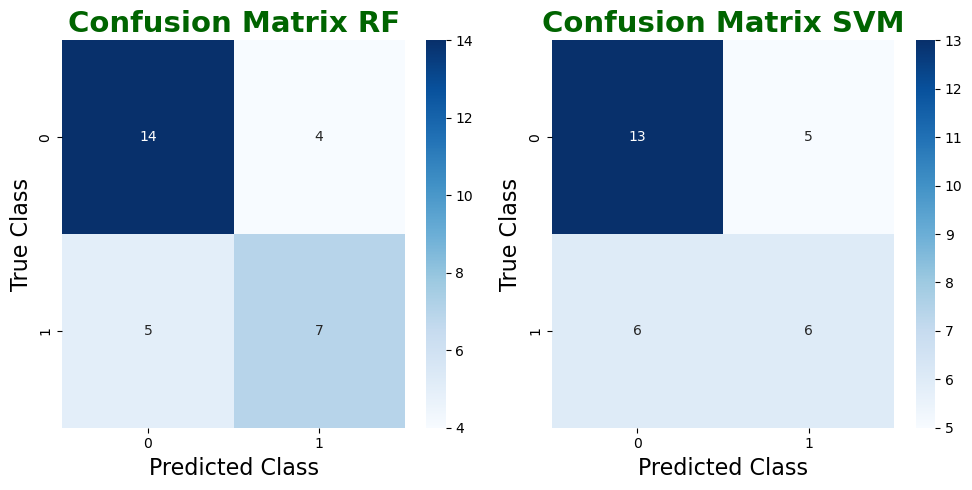

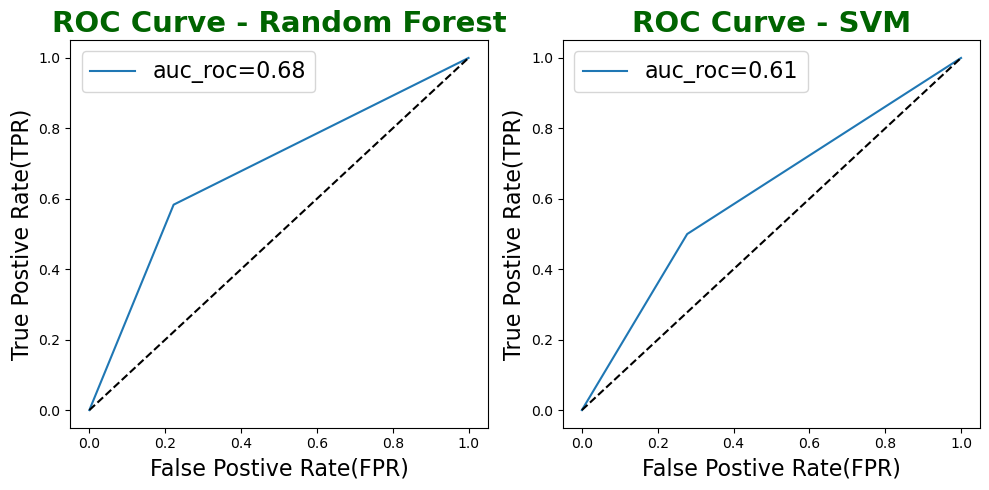

In [402]:
plot_conf_max_rf_svm(conf_max_rf,conf_max_svm)
plot_roc_curve(fpr_rf,tpr_rf,fpr_svm,tpr_svm)

### Appendix IV - Model Peromance Compared

In [403]:
print(model_performance_rf)
print(model_performance_svm)

                         RandomForest Model Performance
matthews_corrcoef_score                            0.37
accuracy_score                                     0.70
precision_score                                    0.64
recall_score                                       0.58
f1_score                                           0.61
model_auc_roc                                      0.68
model_auc_pr                                       0.69
                         Support Vector Machine Model Performance
matthews_corrcoef_score                                      0.23
accuracy_score                                               0.63
precision_score                                              0.55
recall_score                                                 0.50
f1_score                                                     0.52
model_auc_roc                                                0.61
model_auc_pr                                                 0.62
